In [ ]:
# @title Default title text
from IPython.core.display import HTML, display

html_content = '''
<div style="background-color: darkblue; padding: 40px;text-align: center;">
    <h1 style="color: white;">Salesforce Stock Trading Using DQN</h1>
</div>
'''

display(HTML(html_content))


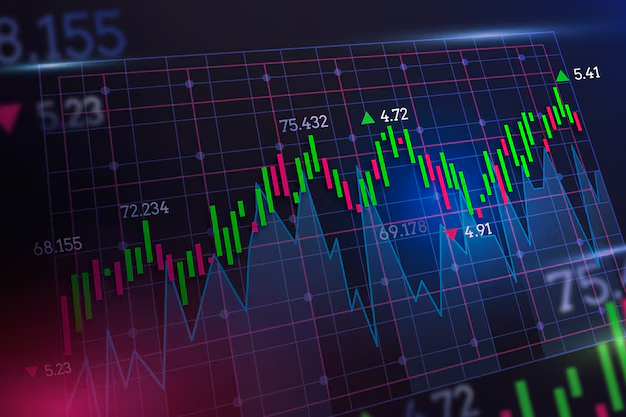

### 1. **Normal Stock Data Graphs**
   - **Purpose**: These graphs provide a visual overview of the stock's historical performance, including metrics like closing prices, moving averages, and trading volume. They are useful for understanding the general trends and behavior of the stock over time.
   - **Examples**:
     - **Close Prices**: Shows how the stock's closing price has changed over time.
     -**Usefulness**: These are essential for preliminary analysis and understanding the stock's behavior before applying any predictive model.

### 2. **DQN Buy/Sell Signals Graph**
   - **Purpose**: This graph specifically illustrates the actions taken by the DQN agent, such as whether it decided to buy, sell, or hold the stock at various points in time. It directly reflects the agent's decision-making process based on the training it has undergone.
   - **Example**:
     - **Buy/Sell Signals**: Plots the points where the agent decided to buy, sell, or hold, allowing you to see how its decisions align with the stock's price movements.
   - **Usefulness**: This is critical for evaluating the performance of the DQN agent. It shows how well the agent's actions align with actual profitable opportunities in the stock's history.

### **Key Differences**:

- **Objective**: Normal graphs are about analyzing past data, while the DQN graph is about assessing the effectiveness of a trained model in making trading decisions.

- **Audience**: Normal graphs are useful for any analyst or trader to understand stock behavior, while the DQN graph is primarily for those interested in the performance of the AI model.

The code automates the process of preparing a dataset in a Kaggle environment.
* It first sets up and cleans the necessary directories, then downloads the dataset from a specified URL in chunks.
* After downloading, it extracts the dataset from compressed formats (like `.zip` or `.tar`). This setup ensures the dataset is properly organized and ready for use in data analysis or machine learning tasks.

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salesforce-stock-date-latest-and-updated:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1730188%2F7598842%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240828%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240828T053044Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c2b9b9972710a746b030013a9978cf61a143c0f8cbec24bf3d505d9e8e1de54c35f7d5c0c6f85c424fa5026f7ad711299c38677333cebbfccdbcb71a3effba250324d2cac48fa19ba67ce7513851c590fd8ec0495699b02a615c543f3436ef924a0d66b5fa8ff441ad5536bad0d3de25b08fa90c19bbbaa8f4ca69d2b2b1b8244e53e9751da5e09ab1875c31a3f02f91fcdcaa4b5e93dac8eb2912732297e329b5a80616cf90c92e47691f362ea409de0d67492e2be37ac606cbf99c2dc85bef2c624af4bf933933349297d7db9b3a39b48d7b230588930a93ff2e38e6e429869a09fde5738ce66634d7df73d66e8b6c1badccfb140f82f69dc1722313098fe'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 85162 bytes downloaded
Downloaded and uncompressed: salesforce-stock-date-latest-and-updated
Data source import complete.


The imported libraries support various tasks related to data processing and analysis.

* **numpy** and **pandas** are essential for handling and manipulating numerical and structured data.

* **tensorflow** is used for building and training machine learning models.

* **collections.deque** is handy for implementing efficient data structures in reinforcement learning.

* **random** aids in performing operations involving randomness.

* For visualization, **seaborn** and **matplotlib.pyplot** provide tools to create informative and attractive plots.

* Finally, s**klearn.preprocessing.MinMaxScaler** helps in normalizing data to a specific range, which is crucial for many machine learning algorithms.

Together, these tools facilitate a smooth workflow from data preparation to analysis and model development.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from collections import deque
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

The code snippet loads a CSV file containing Salesforce stock data into a pandas DataFrame and displays the first few rows of this DataFrame.

Using `pd.read_csv()`, the CSV file located at the specified path is read into a DataFrame named `df`.

This function is used to load tabular data from CSV format into a DataFrame, which is a flexible data structure provided by pandas for handling and analyzing data.

 By calling `df.head()`, the code shows the initial rows of the DataFrame. This preview helps you quickly inspect the data to understand its structure and get an overview of its contents, such as column names and sample values.

In [ ]:
df = pd.read_csv("/kaggle/input/salesforce-stock-date-latest-and-updated/Salesforce_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-06-23,3.7500,4.3250,3.6875,4.30,43574400,0,0.0
1,2004-06-24,4.3875,4.4225,4.1250,4.19,8887200,0,0.0
2,2004-06-25,4.1275,4.1875,3.9475,3.95,6710000,0,0.0
3,2004-06-28,4.0000,4.0525,3.8600,4.00,2270800,0,0.0
4,2004-06-29,4.0000,4.1750,3.9575,4.10,2112000,0,0.0


This code processes the 'Date' column in the DataFrame `df` to improve its usability for time series analysis.

First, `pd.to_datetime(df['Date'])` converts the 'Date' column from a string format into a datetime format. This transformation ensures that pandas recognizes the values as dates and not just plain text, which is crucial for time-based operations and analysis.

Next, `df.set_index('Date', inplace=True)` sets the 'Date' column as the DataFrame's index. By using `inplace=True`, this operation modifies the DataFrame `df` directly without creating a new one. Setting the 'Date' column as the index allows for more efficient time series operations, such as slicing and resampling based on dates, and it facilitates plotting time-based data.


df.head() will display the first few rows of the DataFrame

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-06-23,3.7500,4.3250,3.6875,4.30,43574400,0,0.0
2004-06-24,4.3875,4.4225,4.1250,4.19,8887200,0,0.0
2004-06-25,4.1275,4.1875,3.9475,3.95,6710000,0,0.0
2004-06-28,4.0000,4.0525,3.8600,4.00,2270800,0,0.0
2004-06-29,4.0000,4.1750,3.9575,4.10,2112000,0,0.0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4385.000000,4385.000000,4385.000000,4385.000000,4.385000e+03,4385.0,4385.000000
mean,68.295873,69.129664,67.392306,68.302940,6.903280e+06,0.0,0.000912
std,69.520512,70.271386,68.656155,69.495068,5.300726e+06,0.0,0.060405
min,2.400000,2.462500,2.250000,2.397500,4.636000e+05,0.0,0.000000
25%,13.207500,13.560000,12.917500,13.195000,3.936800e+06,0.0,0.000000
50%,41.880001,42.435001,41.387501,41.900002,5.544400e+06,0.0,0.000000
75%,90.000000,90.699997,89.419998,90.120003,8.214400e+06,0.0,0.000000
max,310.000000,311.750000,307.250000,309.959991,8.733240e+07,0.0,4.000000



* The first subplot displays the closing prices of the stock over time. The dates are shown on the x-axis, and the closing prices are plotted on the y-axis, with the line in blue and a legend indicating it represents the close price.

* The second subplot compares high and low prices of the stock. High prices are plotted in green, and low prices are plotted in red, with both lines sharing the same x-axis of dates and y-axis of prices. This subplot includes a legend to differentiate between the high and low prices.


Finally, `plt.tight_layout()` is used to adjust the spacing of the subplots to prevent overlap, and `plt.show()` displays the complete figure with all the plots. This arrangement provides a comprehensive view of different aspects of the stock data, making it easier to analyze trends and patterns.

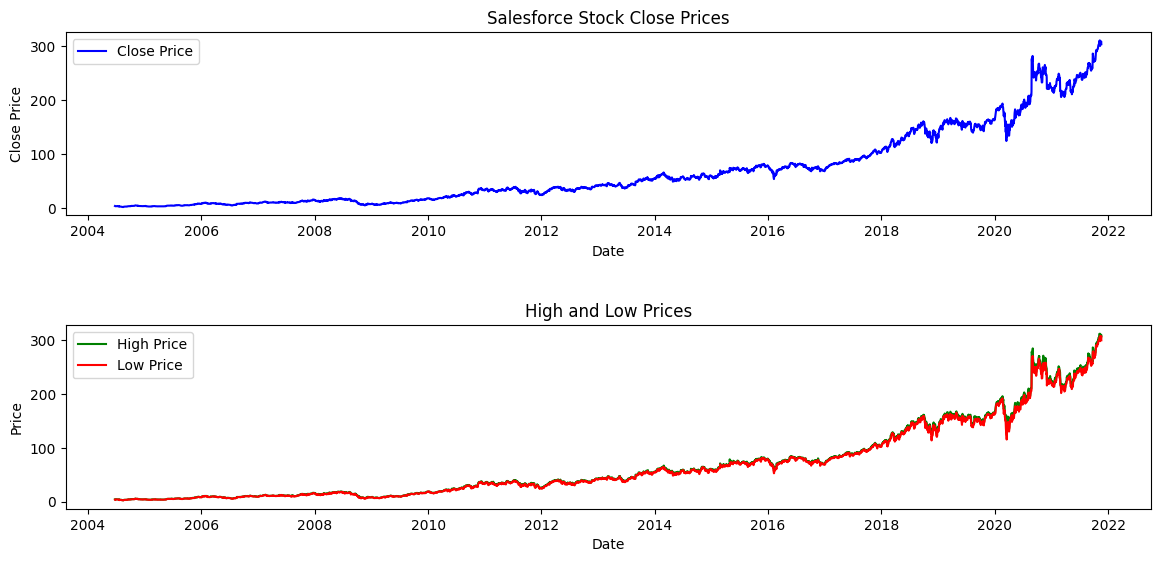

In [ ]:
# Plotting
plt.figure(figsize=(14, 10))

# Plot Close Prices
plt.subplot(3, 1, 1)

plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Salesforce Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()


plt.subplots_adjust(hspace=0.6)

# Plot High and Low Prices
plt.subplot(3, 1, 2)
plt.plot(df.index, df['High'], label='High Price', color='green')
plt.plot(df.index, df['Low'], label='Low Price', color='red')
plt.title('High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


**Feature scaling (MinMaxScaler)**

This code scales the features of the Salesforce stock data to a range between 0 and 1 using `MinMaxScaler`. It transforms the specified columns, converts the scaled data back into a DataFrame, and retains the original dates as the index. This normalization prepares the data for machine learning models by ensuring all features are within a consistent range.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']])
df_scaled = pd.DataFrame(df_scaled, columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
df_scaled['Date'] = df.index
df_scaled.set_index('Date', inplace=True)

**Define DQN class**

In the provided `DQNAgent` class, Deep Q-Learning (DQN) is used to train an agent to make decisions in an environment by learning an optimal policy from interactions with that environment. Here's how DQN addresses key challenges and enhances the agent's learning process:

1. **Handling Complex State Representations**: The `DQNAgent` class uses a deep neural network to approximate the Q-function, allowing it to manage complex and high-dimensional state spaces. This is crucial when the state space is too large or continuous for traditional Q-learning, which relies on a table to store Q-values.

2. **Function Approximation**: The neural network in `build_model()` provides a function approximation of the Q-value function. This means the agent can generalize its learned experience to new, unseen states by leveraging the network's ability to capture patterns and relationships in the data.

3. **Experience Replay**: The `remember()` method stores past experiences in a replay buffer, and the `replay()` method samples mini-batches from this buffer for training. This process helps in breaking the correlation between consecutive experiences and stabilizes the learning process by making the training data more diverse.

4. **Balancing Exploration and Exploitation**: The `act()` method employs an epsilon-greedy strategy to balance exploration (trying new actions) and exploitation (choosing the best-known actions). The epsilon value decreases over time (as controlled by `epsilon_decay`), allowing the agent to gradually shift from exploration to exploitation as it learns more about the environment.

5. **Learning Updates**: In the `replay()` method, the agent updates its Q-values based on the experiences sampled from the replay buffer. It calculates the target Q-value for each experience and adjusts the Q-value predictions of the neural network accordingly. This process helps the agent learn from its past interactions and improve its decision-making over time.

Overall, DQN is used in this code to address the challenges of high-dimensional state spaces, perform function approximation with a neural network, and stabilize training with experience replay and a target network. It enables the agent to effectively learn and make decisions in complex environments.

1. Q-value Update: During experience replay, the agent updates the Q-values based on the Bellman equation.

  Reward is the immediate reward received.

  gamma is the discount factor.

  np.amax(self.model.predict(next_state)[0]) calculates the maximum Q-value for the next state.

2. Bellman Equation
The Q-value update is done using the Bellman equation which updates the Q-values to incorporate both the immediate reward and the discounted future rewards. This update is performed in the replay method to adjust the target Q-values for the training of the model.

Summary
Prediction of Q-values: This is done using self.model.predict(state) which outputs Q-values for each action based on the current state.

Updating Q-values: During experience replay, the Q-values are updated based on the Bellman equation, which incorporates immediate rewards and discounted future rewards.

By following these methods, the DQN algorithm learns to estimate the Q-values effectively, which in turn guides the agent's decision-making process.

In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95 # Discount factor
        self.epsilon = 1.0 # Exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))

        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        # Use learning_rate instead of lr
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)

        q_values = self.model.predict(state)
        return np.argmax(q_values[0])


    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            target = reward

            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:
# Preprocess function for the state
def preprocess_state(state):
    return np.reshape(state, [1, state_size])

In [ ]:
# Initialize the environment
state_size = 7 # Number of features
action_size = 3 # Buy, Hold, Sell

In [ ]:
# Initialize DQNAgent
agent = DQNAgent(state_size, action_size)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training the agent**

This code snippet is used for training the `DQNAgent` on stock market data. Here's an overview of how it works:

1. **Setting Up Training Parameters**: The number of episodes (`num_episodes`), batch size (`batch_size`), and data skipping factor (`skip_factor`) are defined. The `print_frequency` controls how often progress is printed.

2. **Training Loop**: The outer loop iterates over episodes. For each episode, the code processes the stock data using a skip factor to reduce the number of data points processed in each episode.

3. **Data Preprocessing and Action Selection**: Within each episode, the code iterates over the scaled stock data with the specified skip factor. For each data point, it:
   - Preprocesses the current state and the next state.
   - Chooses an action using the agent's `act` method.
   - Calculates a reward based on whether the stock price increased or decreased.
   - Determines if the episode should end (`done`), which occurs if reaching the end of the dataset or when the skip factor causes an out-of-bounds index.

4. **Storing Experiences**: The `remember` method is used to store the experience tuple (state, action, reward, next state, done) in the agent's memory.

5. **Experience Replay**: After collecting experiences for each episode, the `replay` method is called to train the agent's model using a batch of experiences from memory.

6. **Progress Tracking**: The `tqdm` library provides a progress bar to track the completion of training episodes.

This training loop enables the `DQNAgent` to learn from its interactions with the stock data, improving its policy over time through repeated episodes and experience replay.

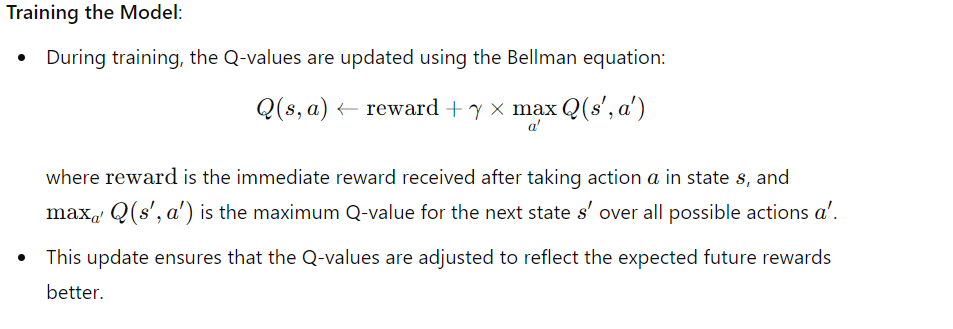

In [ ]:
from tqdm import tqdm

num_episodes = 10 # Set the desired number of episodes
batch_size = 32
skip_factor = 5 # Skip every 5 data points
print_frequency = 1 # Set the desired frequency for printing progress

for episode in tqdm(range(num_episodes), desc='Training Episodes', unit='episode'):
    for i in range(0, len(df_scaled) - 1, skip_factor):
        state = preprocess_state(np.array([df_scaled.iloc[i].values]))
        next_state = preprocess_state(np.array([df_scaled.iloc[i + 1].values]))
        action = agent.act(state)

        # Assume a simple reward function (customize as needed)
        reward = 1 if df['Close'].iloc[i + 1] > df['Close'].iloc[i] else -1
        done = i + skip_factor >= len(df_scaled) - 1 # Done at the last step or when skipping is about to go out of bounds

        agent.remember(state, action, reward, next_state, done)

    agent.replay(batch_size)

print('Training completed.')

Training Episodes:   0%|          | 0/10 [00:00<?, ?episode/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

Training Episodes:  10%|█         | 1/10 [00:09<01:28,  9.81s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

Training Episodes:  20%|██        | 2/10 [00:19<01:16,  9.62s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

Training Episodes:  30%|███       | 3/10 [00:29<01:08,  9.73s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

Training Episodes:  40%|████      | 4/10 [00:38<00:58,  9.73s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

Training Episodes:  50%|█████     | 5/10 [00:50<00:51, 10.38s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

Training Episodes:  60%|██████    | 6/10 [01:01<00:42, 10.54s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

Training Episodes:  70%|███████   | 7/10 [01:12<00:32, 10.68s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

Training Episodes:  80%|████████  | 8/10 [01:25<00:22, 11.42s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

Training Episodes:  90%|█████████ | 9/10 [01:38<00:11, 11.87s/episode]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

Training Episodes: 100%|██████████| 10/10 [01:50<00:00, 11.06s/episode]

Training completed.


**Evaluate the trained agent**

In this code snippet, the `DQNAgent` is evaluated on the stock market data using a simple evaluation loop. Here's a breakdown of its function:

1. **Initial Setup**: The state is initialized by preprocessing the first data point from the scaled dataset. A variable `total_reward` is set to zero to accumulate the total reward obtained during the evaluation.

2. **Evaluation Loop**:
   - The loop iterates through the scaled stock data, except for the last data point.
   - For each step, the agent decides on an action based on the current state using its `act` method.
   - The next state is determined by preprocessing the subsequent data point.
   - A reward is computed based on whether the stock price has increased or decreased compared to the previous day. If the price increased, the reward is 1; otherwise, it is -1.
   - The `done` flag is set to `True` when reaching the second-to-last data point, indicating the end of the evaluation.
   - The agent's experience is stored using the `remember` method, and the reward is added to the `total_reward`.
   - The current state is updated to the next state for the next iteration.

3. **Result Output**: After completing the loop, the total reward accumulated throughout the evaluation is printed. This total reward reflects the performance of the agent based on the simple reward function used.



In [ ]:
state = preprocess_state(np.array([df_scaled.iloc[0].values]))
total_reward = 0

for i in range(len(df_scaled) - 1):
    action = agent.act(state)
    next_state = preprocess_state(np.array([df_scaled.iloc[i + 1].values]))

    # Assume a simple reward function for evaluation

    reward = 1 if df['Close'].iloc[i + 1] > df['Close'].iloc[i] else -1
    done = i == len(df_scaled) - 2 # Done at the last step
    agent.remember(state, action, reward, next_state, done)
    total_reward += reward

    state = next_state
print(f'Total Evaluation Reward: {total_reward}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

**Plotting**

This code snippet visualizes the trading actions taken by the `DQNAgent` in relation to the Salesforce stock prices. Here’s a breakdown of what it does:

1. **Extracting Actions**:
   - The list `buy_sell_actions` is created, containing the actions taken by the agent during training. Each action represents a trading decision made by the agent, where typically:
     - `0` might denote a "Hold" action,
     - `1` indicates a "Buy" action,
     - `2` signifies a "Sell" action.

2. **Plotting Stock Prices**:
   - The first subplot displays the closing prices of Salesforce stock over time. It plots the `Close` price series against the dates, with the line color set to blue.

3. **Plotting Buy/Sell Signals**:
   - The second subplot visualizes the trading signals (Buy/Sell actions) on the same date range. The `buy_sell_actions` are plotted against the dates, where each point represents the action taken by the agent. The line is marked with red dots to highlight where actions occurred.

4. **Visual Layout**:
   - The `plt.figure(figsize=(12, 6))` command sets the overall size of the figure.
   - `plt.subplot(2, 1, 1)` and `plt.subplot(2, 1, 2)` are used to create a two-row subplot layout, allowing the stock prices and trading signals to be displayed in separate panels.
   - Titles, labels, and legends are added to make the plots informative and easy to understand.

This code creates a visual comparison between the stock’s closing prices and the trading signals generated by the `DQNAgent`. This helps in assessing how well the agent’s actions align with the stock’s price movements.



### Action Representation in DQN

1. **Action Space Definition**:
   - The `DQNAgent` class initializes with a set number of possible actions. In your case, it seems to be three actions: `0` (Hold), `1` (Buy), and `2` (Sell). This is specified by `self.action_size` in the DQN agent.
   
2. **Model Output**:
   - The neural network in the DQN model outputs a set of Q-values corresponding to each action. These Q-values represent the expected future reward for each action given the current state.
   - For instance, if the state is a snapshot of stock market conditions, the neural network will produce a Q-value for each action: Hold, Buy, and Sell.

3. **Action Selection**:
   - **Exploration vs. Exploitation**: During training, the agent may choose actions randomly (exploration) or based on the Q-values predicted by the model (exploitation). The exploration is controlled by the `epsilon` parameter.
   - **Epsilon-Greedy Strategy**: With probability `epsilon`, the agent picks a random action (Hold, Buy, or Sell) to explore new strategies. With probability `1 - epsilon`, it chooses the action with the highest Q-value for the current state.

4. **Action Execution**:
   - **Predicted Q-Values**: The model’s `act` method uses these Q-values to decide the action. For example, if the Q-values for a state are `[10, 15, 5]`, the agent will choose the action with the highest Q-value, which is `1` (Buy) in this case.

### Example Walkthrough

Let’s assume you have a state where the DQN model outputs the following Q-values:
- **Q-values**: `[0.5, 1.2, 0.8]`

Here’s how these Q-values are interpreted:
- **Action 0 (Hold)**: Q-value = 0.5
- **Action 1 (Buy)**: Q-value = 1.2
- **Action 2 (Sell)**: Q-value = 0.8

Given these Q-values:
- The highest Q-value is `1.2`, which corresponds to Action 1 (Buy). Therefore, the agent will choose to buy in this scenario.

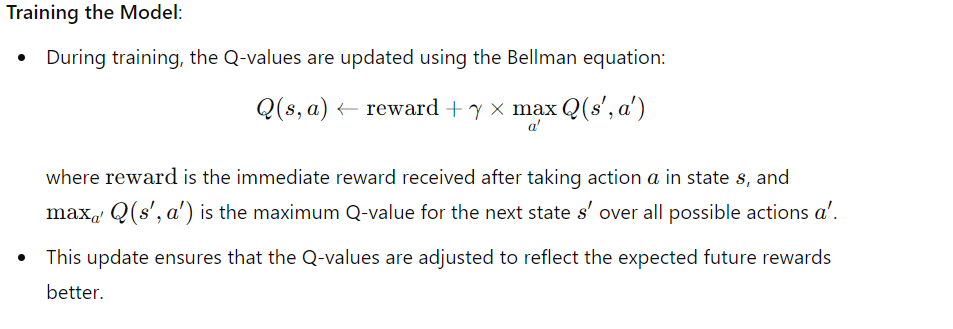

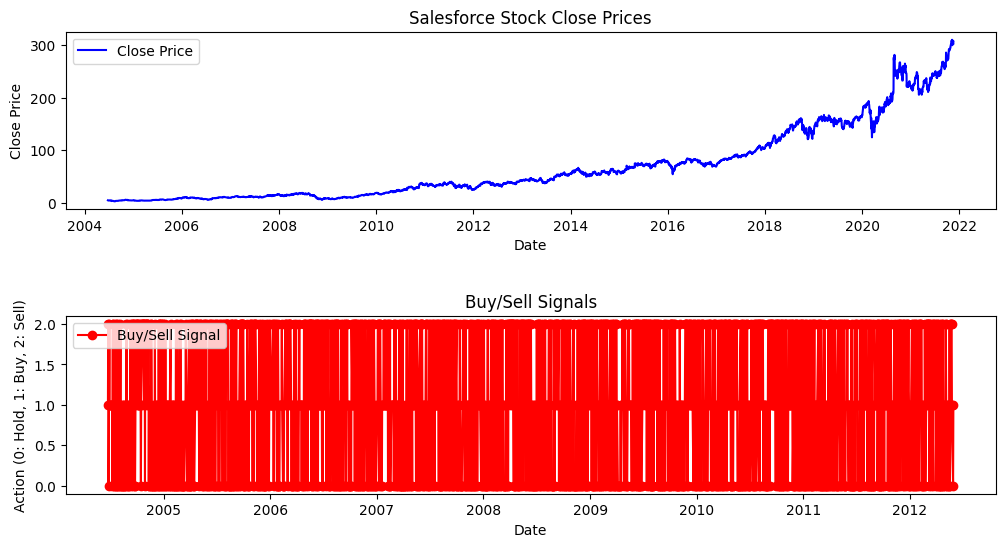

In [33]:
buy_sell_actions = [action[1] for action in agent.memory]

plt.figure(figsize=(12, 6))
# Plot Close Prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Salesforce Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplots_adjust(hspace=0.6)

# Plot Buy/Sell signals
plt.subplot(2, 1, 2)
# Make sure the dimensions match
plt.plot(df.index[:-1][:len(buy_sell_actions)], buy_sell_actions, label='Buy/Sell Signal', marker='o', color='red')
plt.title('Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Action (0: Hold, 1: Buy, 2: Sell)')
plt.legend()

The Buy/Sell Signals graph is generated specifically using the DQN model. The DQN agent analyzes the stock market data, makes decisions on whether to buy, sell, or hold, and these decisions are then plotted as signals on the graph.

Without the DQN or a similar decision-making model, you wouldn't be able to generate this specific Buy/Sell Signals graph because it directly reflects the actions taken by the agent based on its training and the learned policy.

1. Q-value Update: During experience replay, the agent updates the Q-values based  n the Bellman equation.

    Reward is the immediate reward received.

    gamma is the discount factor.

    np.amax(self.model.predict(next_state)[0]) calculates the maximum Q-value for the next state.

2. Bellman Equation The Q-value update is done using the Bellman equation which updates the Q-values to incorporate both the immediate reward and the discounted future rewards. This update is performed in the replay method to adjust the target Q-values for the training of the model.

Summary Prediction of Q-values: This is done using self.model.predict(state) which outputs Q-values for each action based on the current state.

Updating Q-values: During experience replay, the Q-values are updated based on the Bellman equation, which incorporates immediate rewards and discounted future rewards.

By following these methods, the DQN algorithm learns to estimate the Q-values effectively, which in turn guides the agent's decision-making process.